In [33]:
import pickle
import xgboost as xgb

from functions.cleaning import cleaning_rf
from functions.preprocessor import preprocessor

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.model_selection import ValidationCurveDisplay

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Import of clean data

In [2]:
df = cleaning_rf()

In [3]:
X = df.drop(columns=["EVENT_LABEL"])
y = df['EVENT_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3 ,stratify=y, random_state=0)

In [4]:
df.head()

,transaction_amt,transaction_adj_amt,historic_velocity,currency,cvv,signature_image,transaction_type,transaction_env,tranaction_initiate,inital_amount,EVENT_LABEL,day,month,browser,os,acc_age,d_last_logon
0,2167.0,56.0,2572.0,cad,D,F,U,X,O,13646.0,0,Tue,Dec,Opera,Windows,4,3
1,2045.0,48.0,4517.0,cad,X,X,H,W,J,11930.0,0,Tue,Jun,Opera,Linux,3,1
2,2892.0,61.0,5007.0,cad,X,Q,X,X,T,7412.0,0,Mon,May,Mozilla,Linux,7,5
3,3040.0,28.0,6022.0,usd,G,G,C,N,M,4623.0,0,Thu,Mar,Mozilla,Macintosh,3,2
4,2976.0,66.0,2600.0,cad,X,F,F,G,K,1905.0,0,Sat,Mar,Mozilla,Linux,4,2


## Preprocessor

In [5]:
preprocessor = preprocessor(X_train)

## Model

In [6]:
model_xgb = xgb.XGBClassifier(n_jobs=-1, random_state = 42)

# XGBoost

## Undersampling

### Under sampler

In [7]:
under_sampler = RandomUnderSampler()

### Pipeline

In [8]:
u_xgb = Pipeline([('under_sampler', under_sampler),
                  ('preprocessor', preprocessor),
                  ('XGB', model_xgb)])

In [9]:
results = cross_validate(u_xgb, X_train, y_train, return_train_score = True, scoring='recall_macro')
print(f'Average Train Score: {results['train_score'].mean()}')
print(f'Average Test Score: {results['test_score'].mean()}')

/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 2, 3, 4] during transform. Thes

Average Train Score: 0.9331730012591766
Average Test Score: 0.8960758225141386


In [10]:
u_grid = {
        'XGB__min_child_weight': [1, 5, 10],
        'XGB__gamma': [1.5, 2, 5],
        'XGB__subsample': [0.6, 0.8, 1.0],
        'XGB__colsample_bytree': [0.6, 0.8, 1.0],
        'XGB__max_depth': [3, 4, 5]
        }

In [11]:
u_grid_search = GridSearchCV(estimator=u_xgb, param_grid=u_grid, cv=5, scoring='recall_macro', return_train_score=True)
u_grid_search.fit(X_train, y_train)
print(f'Average Train Score: {u_grid_search.cv_results_['mean_train_score'].mean()}')
print(f'Average Test Score: {u_grid_search.cv_results_['mean_test_score'].mean()}')

/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2, 3, 4] during transform. These u

/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 2, 3, 4] during transform. T

Average Train Score: 0.9037003564825501
Average Test Score: 0.8941614063213907


## Oversampling

### Over sampler

In [12]:
over_sampler = SMOTE()

### Pipeline

In [13]:
o_xgb = Pipeline([('preprocessor', preprocessor),
                  ('over_sampler', over_sampler),
                  ('XGB', model_xgb)])

In [14]:
results = cross_validate(o_xgb, X_train, y_train, return_train_score = True, scoring='recall_macro')
print(f'Average Train Score: {results['train_score'].mean()}')
print(f'Average Test Score: {results['test_score'].mean()}')

/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Average Train Score: 0.8638100070246745
Average Test Score: 0.8444639216539518


In [15]:
o_grid = {
    'XGB__min_child_weight': [5, 10],
    'XGB__subsample': [0.6, 0.8, 1.0],
    'XGB__gamma': [2, 5],        
    'XGB__colsample_bytree': [0.6, 0.8, 1.0],
    'XGB__max_depth': [3, 5, 8,10]
        }

In [16]:
o_grid_search = GridSearchCV(estimator=o_xgb, param_grid=o_grid, cv=3, scoring='recall_macro', return_train_score=True)
o_grid_search.fit(X_train, y_train)
print(f'Average Train Score: {o_grid_search.cv_results_['mean_train_score'].mean()}')
print(f'Average Test Score: {o_grid_search.cv_results_['mean_test_score'].mean()}')

/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 4] during transform. These unknown categories 

Average Train Score: 0.844994585826791
Average Test Score: 0.8289574018642263


/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will b

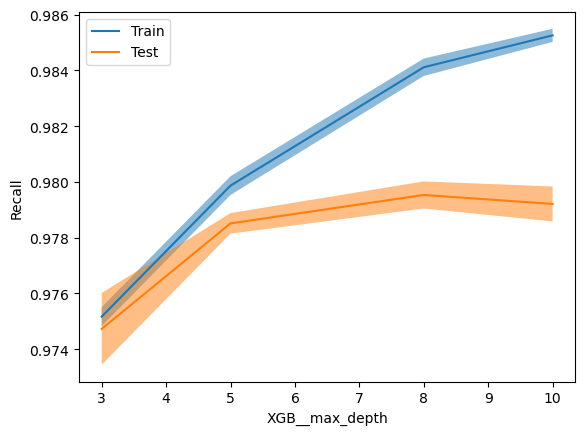

In [41]:
disp = ValidationCurveDisplay.from_estimator(
    o_grid_search.best_estimator_,
    X,
    y,
    param_name="XGB__max_depth",
    param_range=[3, 5, 8,10],
    score_type="both",
    n_jobs=2,
    score_name="Recall",
)

# Export

In [17]:
with open('models/under_xgb.pkl', 'wb') as f:
    pickle.dump(u_grid_search, f)
f.close()

In [18]:
with open('models/over_xgb.pkl', 'wb') as f:
    pickle.dump(o_grid_search, f)
f.close()